In [6]:
from time import sleep
import selenium

### Kick off!

In [7]:
from selenium import webdriver 
driver=webdriver.Chrome('./chromedriver')
driver.get("https://shopping.pchome.com.tw/")

In [13]:
driver.title

'PChome 線上購物'

In [14]:
#目前網址
driver.current_url

'https://shopping.pchome.com.tw/'

In [15]:
#最大化瀏覽器
driver.maximize_window()

### find_element_by_link_text

In [18]:
#查找文字
element_24h=driver.find_elements_by_link_text('24h購物')
element_24h

[<selenium.webdriver.remote.webelement.WebElement (session="3cf500c6fcb70638efcde98576d5afd2", element="0.7126294286642665-1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3cf500c6fcb70638efcde98576d5afd2", element="0.7126294286642665-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3cf500c6fcb70638efcde98576d5afd2", element="0.7126294286642665-3")>]

In [20]:
element_24h[0].click()

### find_element_partial_by_link_text

In [23]:
#查找相似文字
element_shopping=driver.find_elements_by_partial_link_text('購物')
for i in range(len(element_shopping)):
    print(element_shopping[i].text)

PChome線上購物 - 24h到貨
線上購物
24h購物
購物中心
購物車
購物滿$490 免運費
24h購物
購物中心
PChome線上購物


### find_element_by_css_selector

In [26]:
#使用css selector
element_search=driver.find_element_by_css_selector('input[id="keyword"]')
element_search.send_keys('Macbook Pro')

In [28]:
element_search=driver.find_element_by_css_selector('input[type="text"]')
element_search.clear()
element_search.send_keys('Macbook Air')

In [ ]:
element_image=driver.find_element_by_css_selector('img[alt="請輸入"]')

#[class^='cls'] 抓取 class 屬性值為 "cls" 開頭的 element
#[class$='cls'] 抓取 class 屬性值為 "cls" 結尾的 element
#[class*='cls'] 抓取 class 屬性值中包含字串 "cls" 的 element

我們只想抓取含有 title、href 與 class 屬性的 element，程式碼如下所示。
find_element_by_css_selector("a[title][href][class]")

### find_element_by_xpath

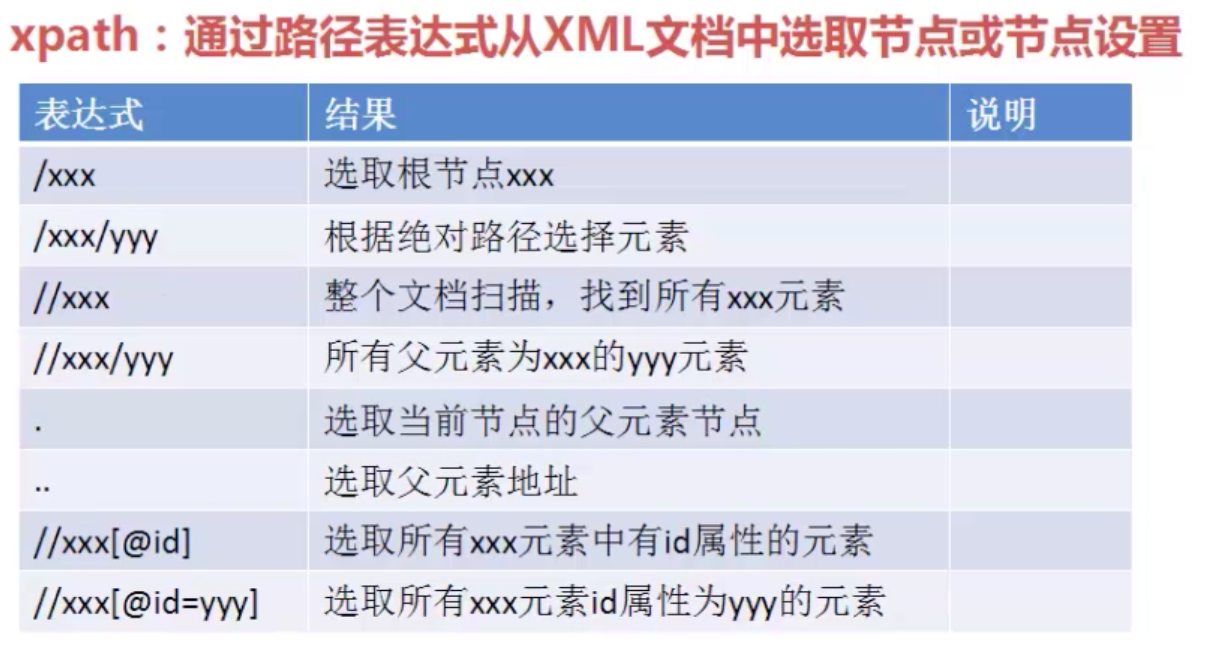

In [29]:
#相對路徑
element=driver.find_element_by_xpath('//*[@id="keyword"]')

### iframe

In [ ]:
driver.switch_to.frame(0)  # 1.用frame的index来定位，第一个是0
driver.switch_to.frame("frame1")  # 2.用id来定位
driver.switch_to.frame("myframe")  # 3.用name来定位
driver.switch_to.frame(driver.find_element_by_tag_name("iframe"))  # 4.用WebElement对象来定位
#通常采用id和name就能够解决绝大多数问题。但有时候frame并无这两项属性，则可以用index和WebElement来定位：
#index从0开始，传入整型参数即判定为用index定位，传入str参数则判定为用id/name定位
#WebElement对象，即用find_element系列方法所取得的对象，我们可以用tag_name、xpath等来定位frame对象
'''
<iframe src="myframetest.html" />
'''
#5.用xpath定位，传入WebElement对象：
driver.switch_to.frame(driver.find_element_by_xpath("//iframe[contains(@src,'myframe')]"))

In [ ]:
#切回主文檔
driver.switch_to.default_content()
#嵌套frame的操作
'''
<html>
    <iframe id="frame1">
        <iframe id="frame2" / >
    </iframe>
</html>
'''
driver.switch_to.frame("frame1")
driver.switch_to.frame("frame2")
driver.switch_to.parent_frame()  # 如果當前已是主文檔，則無效果


網站自動化測試對於 iFrame的處理
https://www.qa-knowhow.com/?p=2525

### click問題

python+selenium 定位到元素，无法点击
解决方案：
1.在执行click之前多休眠几秒
2.确认自己的元素是否定位正确，是否有id，name，class相同的元素，加下划线的是遮挡的div确定它的位置判断他的z_index是否大于你要点击元素的z_index
3.用Enter键代替click
https://blog.csdn.net/chang995196962/article/details/84654203
python+selenium实现登录账户后自动点击
https://blog.csdn.net/lijun538/article/details/50695914

### 等待

Python selenium —— 一定要会用selenium的等待，三种等待方式解读
https://blog.csdn.net/huilan_same/article/details/52544521

### 綜合整理

https://blog.csdn.net/qq_29186489/article/details/78661008